In [1]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset=pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/telco-non-internet.csv')
dataset=dataset.dropna()
#dataset=dataset.fillna(0)

dataset['state']=le.fit_transform(dataset['state'])
dataset['area_code']=le.fit_transform(dataset['area_code'])
dataset['international_plan']=le.fit_transform(dataset['international_plan'])
dataset['voice_mail_plan']=le.fit_transform(dataset['voice_mail_plan'])
dataset['churn']=le.fit_transform(dataset['churn'])

df1=dataset[dataset['churn']==0]
df=dataset[dataset['churn']==1]


In [2]:
pip install ctganenn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_c

In [3]:
from ctganenn import CTGANENN

X,y=CTGANENN(df,df1,3054,'churn')

Gen. (-0.95) | Discrim. (-0.07): 100%|██████████| 100/100 [01:03<00:00,  1.57it/s]


In [7]:
# decision tree
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# define grid
balance1 = [{0:10,1:100},{0:20,1:100},{0:30,1:100},{0:40,1:100},{0:50,1:100},{0:60,1:100},{0:70,1:100},{0:80,1:100},{0:90,1:100},{0:100,1:100}]
balance = [{0:100,1:10},{0:100,1:20},{0:100,1:30},{0:100,1:40},{0:100,1:50},{0:100,1:60},{0:100,1:70},{0:100,1:80},{0:100,1:90},{0:100,1:100}]
param_grid = dict(class_weight=balance1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984628 using {'class_weight': {0: 10, 1: 100}}
0.984628 (0.003589) with: {'class_weight': {0: 10, 1: 100}}
0.984412 (0.003820) with: {'class_weight': {0: 20, 1: 100}}
0.981625 (0.003517) with: {'class_weight': {0: 30, 1: 100}}
0.980779 (0.003857) with: {'class_weight': {0: 40, 1: 100}}
0.984275 (0.004471) with: {'class_weight': {0: 50, 1: 100}}
0.982166 (0.004274) with: {'class_weight': {0: 60, 1: 100}}
0.981498 (0.003382) with: {'class_weight': {0: 70, 1: 100}}
0.981946 (0.004528) with: {'class_weight': {0: 80, 1: 100}}
0.983207 (0.003476) with: {'class_weight': {0: 90, 1: 100}}
0.981570 (0.003287) with: {'class_weight': {0: 100, 1: 100}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('DT-telco2-ctgan-auc.xlsx', index=False)

In [8]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940751 using {'class_weight': {0: 90, 1: 100}}
0.867008 (0.011028) with: {'class_weight': {0: 10, 1: 100}}
0.903246 (0.010956) with: {'class_weight': {0: 20, 1: 100}}
0.910751 (0.009252) with: {'class_weight': {0: 30, 1: 100}}
0.917987 (0.007936) with: {'class_weight': {0: 40, 1: 100}}
0.932964 (0.010746) with: {'class_weight': {0: 50, 1: 100}}
0.931005 (0.009544) with: {'class_weight': {0: 60, 1: 100}}
0.934268 (0.007277) with: {'class_weight': {0: 70, 1: 100}}
0.937154 (0.009027) with: {'class_weight': {0: 80, 1: 100}}
0.940751 (0.007957) with: {'class_weight': {0: 90, 1: 100}}
0.938624 (0.006191) with: {'class_weight': {0: 100, 1: 100}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('DT-telco2-ctgan-f1.xlsx', index=False)

In [9]:
from imblearn.metrics import geometric_mean_score
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.938883 using {'class_weight': {0: 90, 1: 100}}
0.883422 (0.010495) with: {'class_weight': {0: 10, 1: 100}}
0.914958 (0.009977) with: {'class_weight': {0: 20, 1: 100}}
0.919807 (0.008534) with: {'class_weight': {0: 30, 1: 100}}
0.924566 (0.007547) with: {'class_weight': {0: 40, 1: 100}}
0.936882 (0.009896) with: {'class_weight': {0: 50, 1: 100}}
0.933396 (0.008944) with: {'class_weight': {0: 60, 1: 100}}
0.934869 (0.007208) with: {'class_weight': {0: 70, 1: 100}}
0.936299 (0.008742) with: {'class_weight': {0: 80, 1: 100}}
0.938883 (0.007765) with: {'class_weight': {0: 90, 1: 100}}
0.936147 (0.006339) with: {'class_weight': {0: 100, 1: 100}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('DT-telco2-ctgan-gmean.xlsx', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

weights = {0:100,1:100}
clf = DecisionTreeClassifier(class_weight=weights)

y_pred = cross_val_predict(clf, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)


[[4999  175]
 [ 396 2499]]


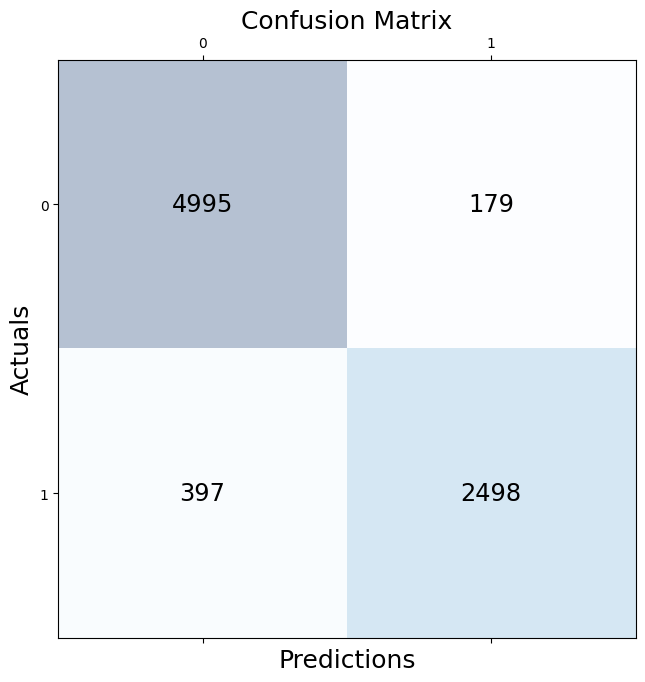

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# LR
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# define grid
balance1 = [{0:10,1:100},{0:20,1:100},{0:30,1:100},{0:40,1:100},{0:50,1:100},{0:60,1:100},{0:70,1:100},{0:80,1:100},{0:90,1:100},{0:100,1:100}]
balance = [{0:100,1:10},{0:100,1:20},{0:100,1:30},{0:100,1:40},{0:100,1:50},{0:100,1:60},{0:100,1:70},{0:100,1:80},{0:100,1:90},{0:100,1:100}]
param_grid = dict(class_weight=balance1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971586 using {'class_weight': {0: 10, 1: 100}}
0.971586 (0.005409) with: {'class_weight': {0: 10, 1: 100}}
0.971553 (0.005951) with: {'class_weight': {0: 20, 1: 100}}
0.969867 (0.006439) with: {'class_weight': {0: 30, 1: 100}}
0.969430 (0.006259) with: {'class_weight': {0: 40, 1: 100}}
0.969795 (0.006371) with: {'class_weight': {0: 50, 1: 100}}
0.969166 (0.006475) with: {'class_weight': {0: 60, 1: 100}}
0.968465 (0.006563) with: {'class_weight': {0: 70, 1: 100}}
0.967606 (0.006945) with: {'class_weight': {0: 80, 1: 100}}
0.967365 (0.007025) with: {'class_weight': {0: 90, 1: 100}}
0.967059 (0.007043) with: {'class_weight': {0: 100, 1: 100}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('LR-telco2-ctgan-auc.xlsx', index=False)

In [ ]:
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.927069 using {'class_weight': {0: 100, 1: 100}}
0.804477 (0.012907) with: {'class_weight': {0: 10, 1: 100}}
0.865202 (0.007200) with: {'class_weight': {0: 20, 1: 100}}
0.885942 (0.009802) with: {'class_weight': {0: 30, 1: 100}}
0.901988 (0.008489) with: {'class_weight': {0: 40, 1: 100}}
0.911299 (0.006595) with: {'class_weight': {0: 50, 1: 100}}
0.918216 (0.007554) with: {'class_weight': {0: 60, 1: 100}}
0.922308 (0.007590) with: {'class_weight': {0: 70, 1: 100}}
0.923565 (0.007906) with: {'class_weight': {0: 80, 1: 100}}
0.924960 (0.008534) with: {'class_weight': {0: 90, 1: 100}}
0.927069 (0.006616) with: {'class_weight': {0: 100, 1: 100}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('LR-telco2-ctgan-f1.xlsx', index=False)

In [ ]:
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.922528 using {'class_weight': {0: 100, 1: 100}}
0.824056 (0.012635) with: {'class_weight': {0: 10, 1: 100}}
0.879930 (0.006860) with: {'class_weight': {0: 20, 1: 100}}
0.896038 (0.009254) with: {'class_weight': {0: 30, 1: 100}}
0.908398 (0.008193) with: {'class_weight': {0: 40, 1: 100}}
0.914737 (0.006647) with: {'class_weight': {0: 50, 1: 100}}
0.919607 (0.007690) with: {'class_weight': {0: 60, 1: 100}}
0.921572 (0.007838) with: {'class_weight': {0: 70, 1: 100}}
0.921524 (0.008056) with: {'class_weight': {0: 80, 1: 100}}
0.921723 (0.008932) with: {'class_weight': {0: 90, 1: 100}}
0.922528 (0.006706) with: {'class_weight': {0: 100, 1: 100}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('LR-telco2-ctgan-gmean.xlsx', index=False)

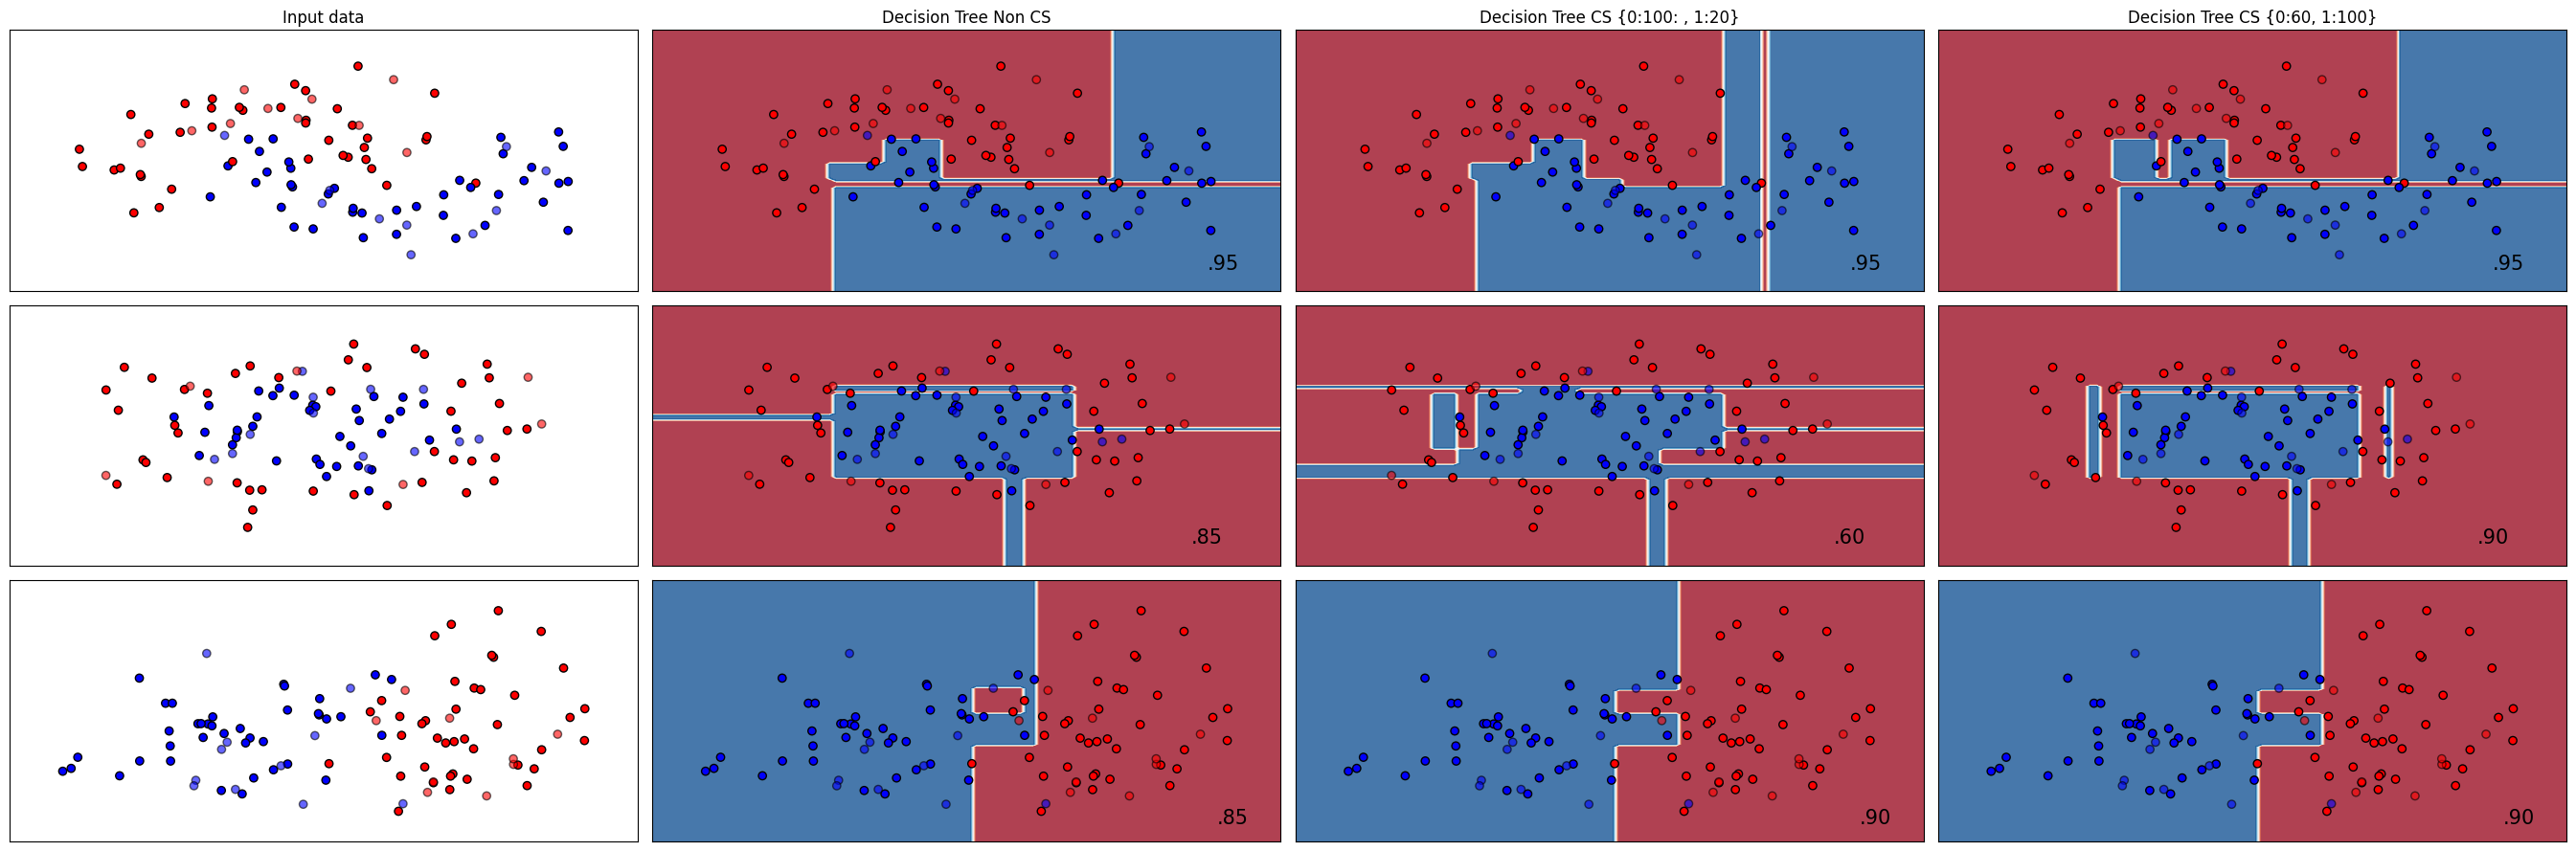

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler


names = [
    "Decision Tree Non CS",
    "Decision Tree CS {0:100: , 1:20}",
    "Decision Tree CS {0:60, 1:100}",
]

classifiers = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(class_weight={0: 100, 1: 20}),
    DecisionTreeClassifier(class_weight={0: 60, 1: 100})
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()